<a href="https://colab.research.google.com/github/arfanrifqi/customer-churn-prediction/blob/main/customer_churn_prediction_for_beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade openpyxl

#**import libraries**

In [ ]:
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")
import pickle

from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from pathlib import Path
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#**load dataset**

In [ ]:
df_churn = pd.read_excel('/content/gdrive/MyDrive/data bangalore/final project/E Commerce Dataset.xlsx', sheet_name='E Comm')

#**check dataset**

In [ ]:
print(df_churn.info())
print(df_churn.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df_churn.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500


In [ ]:
print(df_churn.head(5))

   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

# **Explorasi Data**

In [ ]:
df_churn.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
df_churn_corr = df_churn.corr().abs()
df_churn_corr.style.background_gradient(axis=1,cmap=sns.light_palette('red', as_cmap=True))

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,1.000000,0.019083,0.029952,0.003239,0.058909,0.598417,0.411098,0.033146,0.160814,0.009944,0.117243,0.234302,0.139008,0.113243,0.217129
Churn,0.019083,1.000000,0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,0.010058,0.008264,0.028697,0.160757,0.154118
Tenure,0.029952,0.349408,1.000000,0.060688,0.018218,0.021226,0.023983,0.013903,0.237666,0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
CityTier,0.003239,0.084703,0.060688,1.000000,0.010624,0.009150,0.027934,0.011554,0.029440,0.003375,0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,0.058909,0.076630,0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,0.011020,0.028696,0.038795,0.003935,0.002681,0.017829,0.009200
HourSpendOnApp,0.598417,0.018675,0.021226,0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.411098,0.107939,0.023983,0.027934,0.019071,0.316800,1.000000,0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,0.033146,0.105481,0.013903,0.011554,0.007722,0.031858,0.017228,1.000000,0.053583,0.031115,0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,0.160814,0.043931,0.237666,0.029440,0.011020,0.145126,0.084997,0.053583,1.000000,0.026399,0.015533,0.042120,0.007609,0.064847,0.186688
Complain,0.009944,0.250188,0.021268,0.003375,0.028696,0.006976,0.003407,0.031115,0.026399,1.000000,0.004529,0.008174,0.019307,0.043546,0.000525


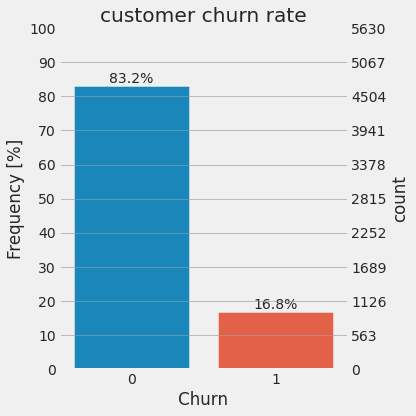

In [ ]:
ncount = len(df_churn)

plt.figure(figsize=(6,6))
ax = sns.countplot(x="Churn", data=df_churn)
plt.title('customer churn rate')


ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()

ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')
    ax2.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='y')
    


ax.yaxis.set_major_locator(ticker.LinearLocator(11))
ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

plt.tight_layout()
plt.show()

In [ ]:
print(df_churn.CustomerID.nunique())

5630


In [ ]:
num_features = ['Tenure','HourSpendOnApp','OrderAmountHikeFromlastYear','CashbackAmount','WarehouseToHome','NumberOfAddress','OrderCount','DaySinceLastOrder','CouponUsed']
cat_features = ['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','SatisfactionScore','MaritalStatus','Complain','CityTier']

In [ ]:
for col in cat_features:
  print(f'''value count kolom {col} :''')
  print(df_churn[col].value_counts())
  print()

value count kolom PreferredLoginDevice :
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

value count kolom PreferredPaymentMode :
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

value count kolom Gender :
Male      3384
Female    2246
Name: Gender, dtype: int64

value count kolom PreferedOrderCat :
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

value count kolom SatisfactionScore :
3    1698
1    1164
5    1108
4    1074
2     586
Name: SatisfactionScore, dtype: int64

value count kolom MaritalStatus :
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

value count kolom Complain 

In [ ]:
df_churn['PreferredPaymentMode'] = df_churn['PreferredPaymentMode'].replace(['Cash on Delivery', 'CC'], ['COD','Credit Card'])
df_churn['PreferedOrderCat'] = df_churn['PreferedOrderCat'].replace(['Mobile'], ['Mobile Phone'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

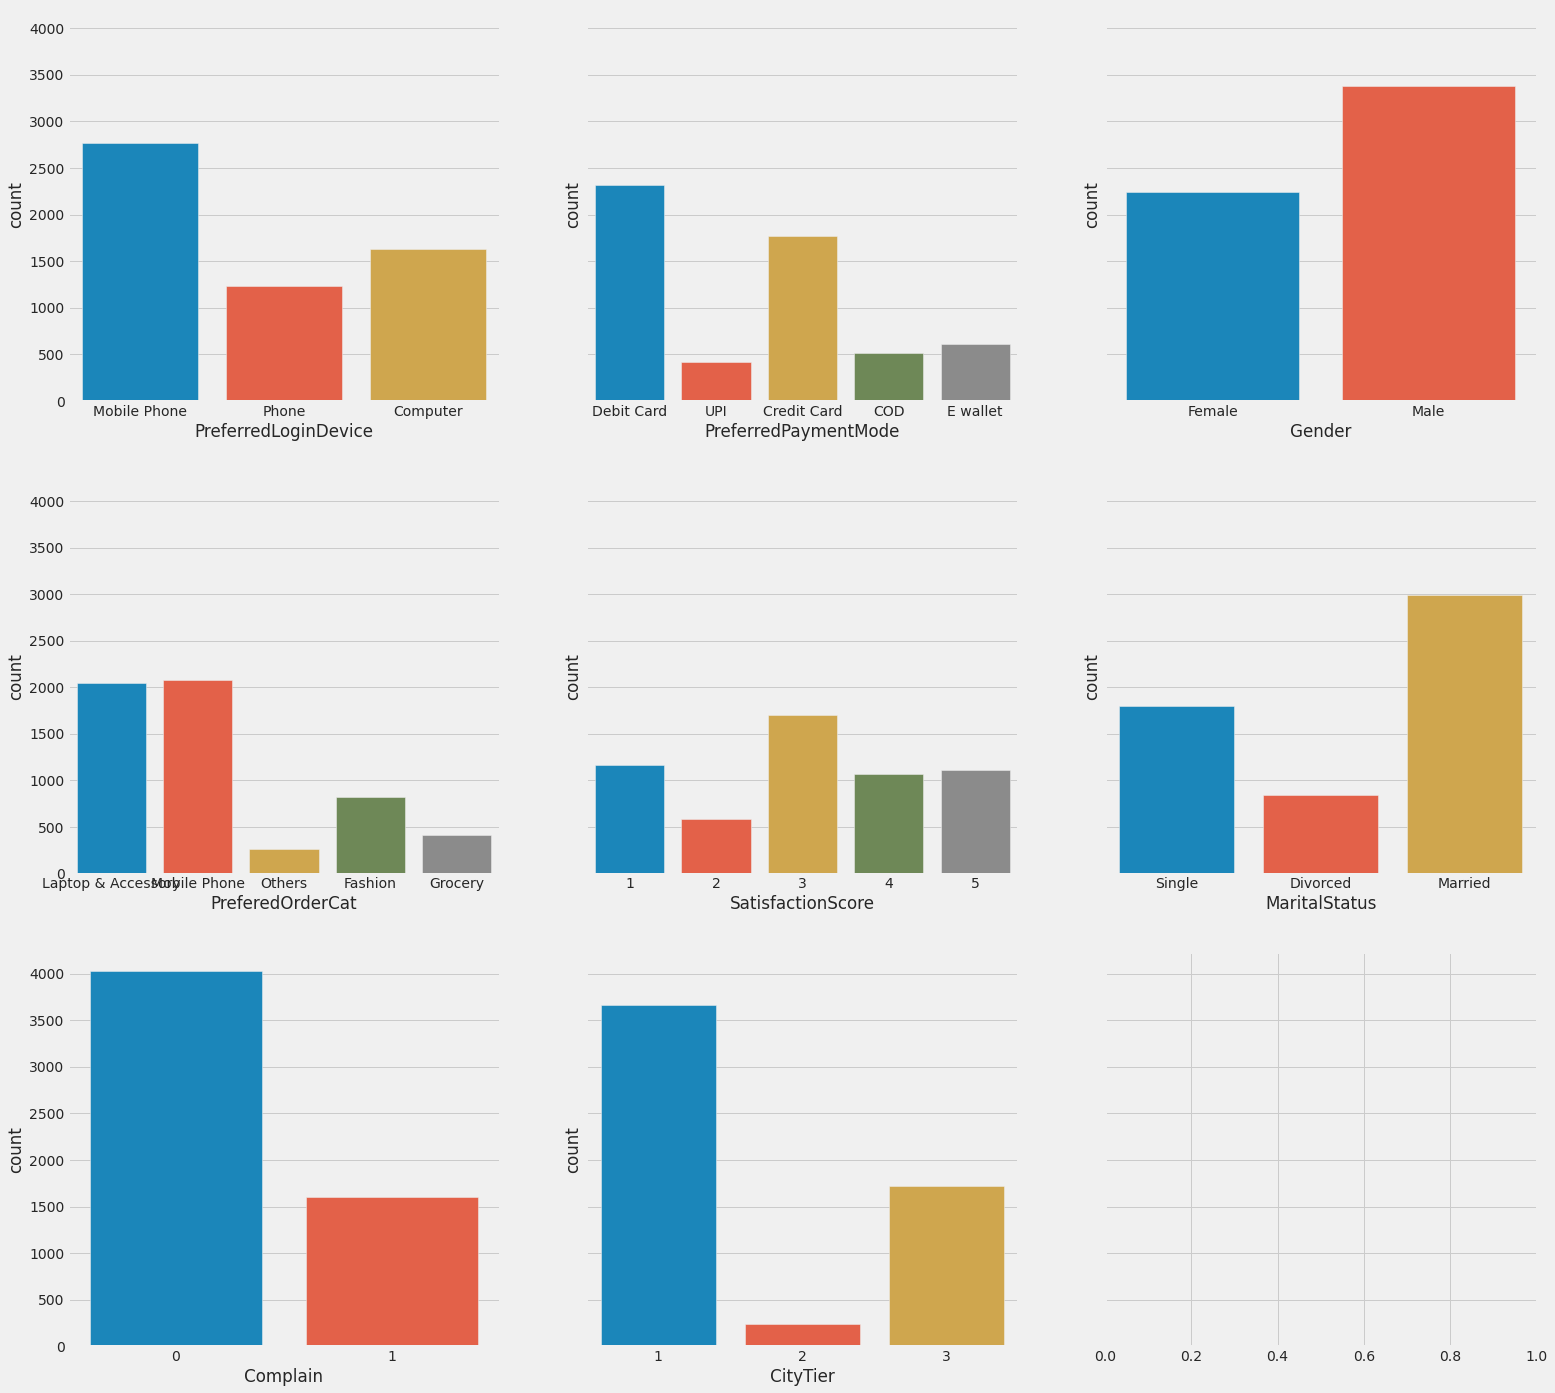

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(20,20), sharey=True)
plt.subplots_adjust(right=1.1, top=1)

sns.countplot('PreferredLoginDevice', data=df_churn, ax=axes[0,0])
sns.countplot('PreferredPaymentMode', data=df_churn, ax=axes[0,1])
sns.countplot('Gender', data=df_churn, ax=axes[0,2])
sns.countplot('PreferedOrderCat', data=df_churn, ax=axes[1,0])
sns.countplot('SatisfactionScore', data=df_churn, ax=axes[1,1])
sns.countplot('MaritalStatus', data=df_churn, ax=axes[1,2])
sns.countplot('Complain', data=df_churn, ax=axes[2,0])
sns.countplot('CityTier', data=df_churn, ax=axes[2,1])

###**perbandingan churn dengan category features**

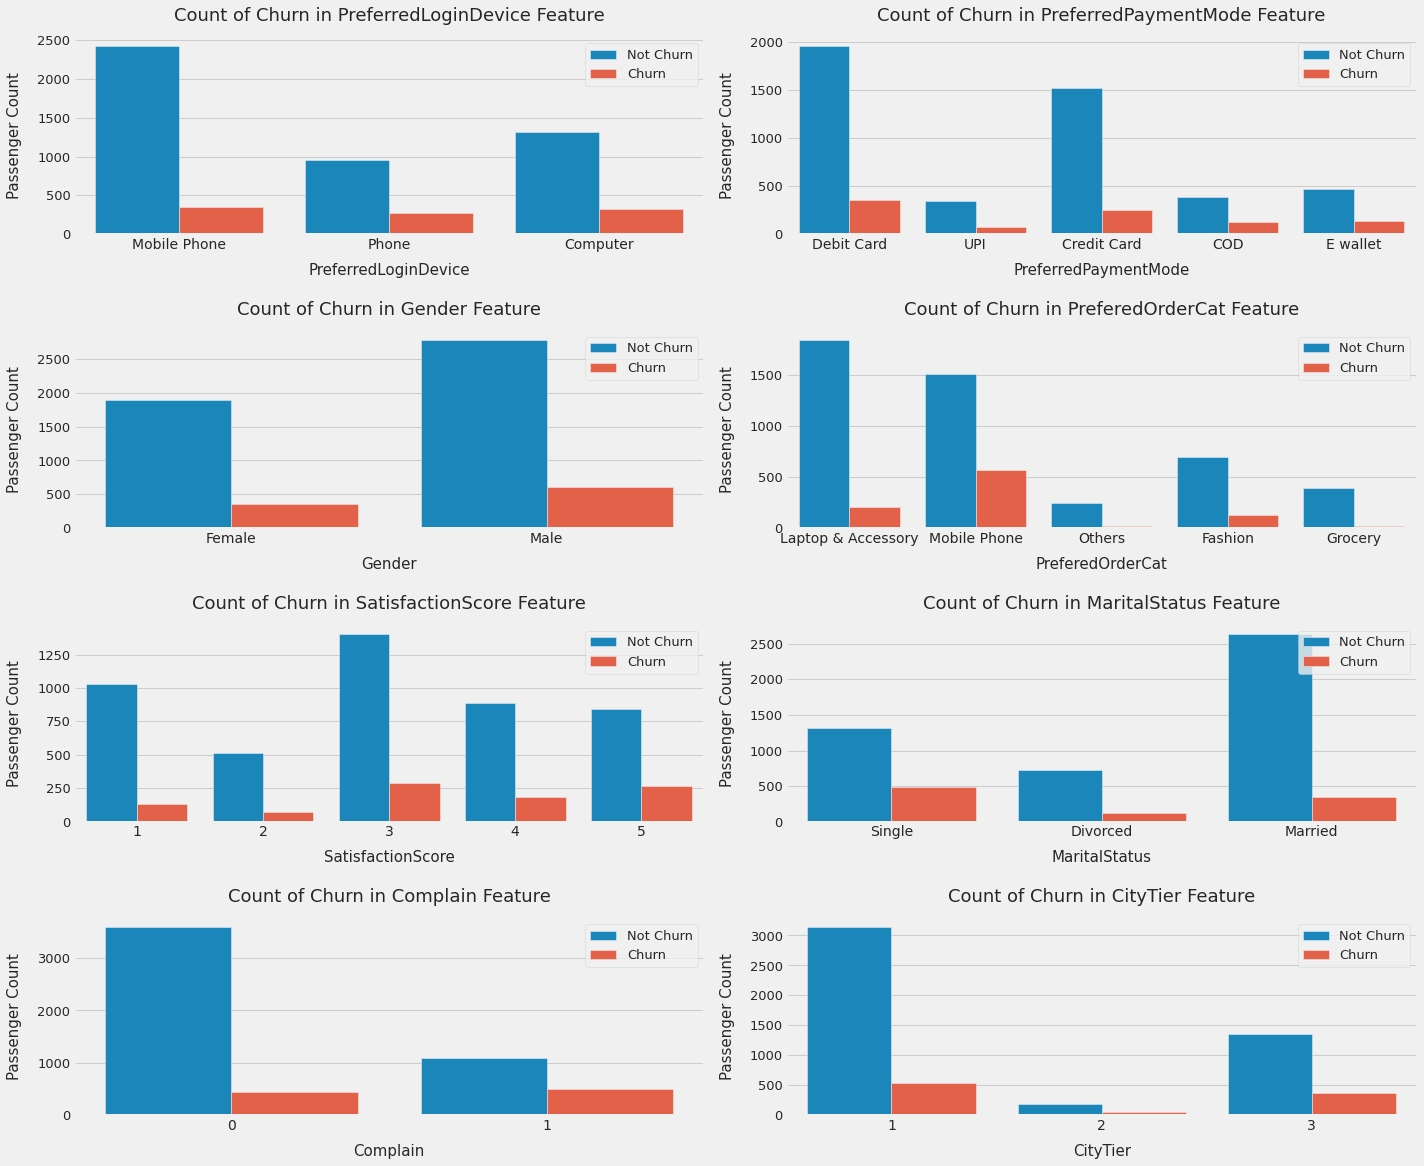

In [ ]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20, 20))
plt.subplots_adjust(right=1.6, top=1.5)


for i, feature in enumerate(cat_features, 1):

	plt.subplot(5,2,i)
	sns.countplot(x=feature, hue='Churn', data=df_churn)
	
	plt.xlabel('{}'.format(feature), size=15, labelpad=11)
	plt.ylabel('Passenger Count', size=15, labelpad=15)
	plt.tick_params(axis='x', labelsize=14)
	plt.tick_params(axis='y', labelsize=13)

	plt.legend(['Not Churn', 'Churn'], loc='upper right', prop={'size':13})
	plt.title('Count of Churn in {} Feature'. format(feature), size=18, y=1.05)
	plt.grid(color='darkgray', linestyle='-', linewidth=0.5, axis='y')

plt.tight_layout()
plt.show()

In [ ]:
error = 0.05

for column in cat_features:
    table = df_churn[[column, 'Churn']].pivot_table(index='Churn',
                                                   columns=column,
                                                   aggfunc=lambda x: len(x))
    _, p_value, _, _ = chi2_contingency(table)

    print('Variable:', column)
    print('p-value: ', p_value)
    if p_value < error:
        print('Variabel ' + column + ' dan churn berkorelasi')
    else:
        print('Variabel ' + column + ' dan churn tidak berkorelasi')
    print('')

Variable: PreferredLoginDevice
p-value:  1.0756922373255213e-16
Variabel PreferredLoginDevice dan churn berkorelasi

Variable: PreferredPaymentMode
p-value:  1.4978570960706276e-10
Variabel PreferredPaymentMode dan churn berkorelasi

Variable: Gender
p-value:  0.030820940334890086
Variabel Gender dan churn berkorelasi

Variable: PreferedOrderCat
p-value:  3.11924340428766e-61
Variabel PreferedOrderCat dan churn berkorelasi

Variable: SatisfactionScore
p-value:  2.4233349782737515e-14
Variabel SatisfactionScore dan churn berkorelasi

Variable: MaritalStatus
p-value:  1.073011277910542e-41
Variabel MaritalStatus dan churn berkorelasi

Variable: Complain
p-value:  2.6644609654641377e-78
Variabel Complain dan churn berkorelasi

Variable: CityTier
p-value:  1.2612000812079956e-09
Variabel CityTier dan churn berkorelasi



In [ ]:
df_churn[cat_features].describe(include='all')

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,SatisfactionScore,MaritalStatus,Complain,CityTier
count,5630,5630,5630,5630,5630.000000,5630,5630.000000,5630.000000
unique,3,5,2,5,NaN,3,NaN,NaN
top,Mobile Phone,Debit Card,Male,Mobile Phone,NaN,Married,NaN,NaN
freq,2765,2314,3384,2080,NaN,2986,NaN,NaN
mean,NaN,NaN,NaN,NaN,3.066785,NaN,0.284902,1.654707
std,NaN,NaN,NaN,NaN,1.380194,NaN,0.451408,0.915389
min,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000
25%,NaN,NaN,NaN,NaN,2.000000,NaN,0.000000,1.000000
50%,NaN,NaN,NaN,NaN,3.000000,NaN,0.000000,1.000000
75%,NaN,NaN,NaN,NaN,4.000000,NaN,1.000000,3.000000


###**perbandingan churn dengan numeric features**

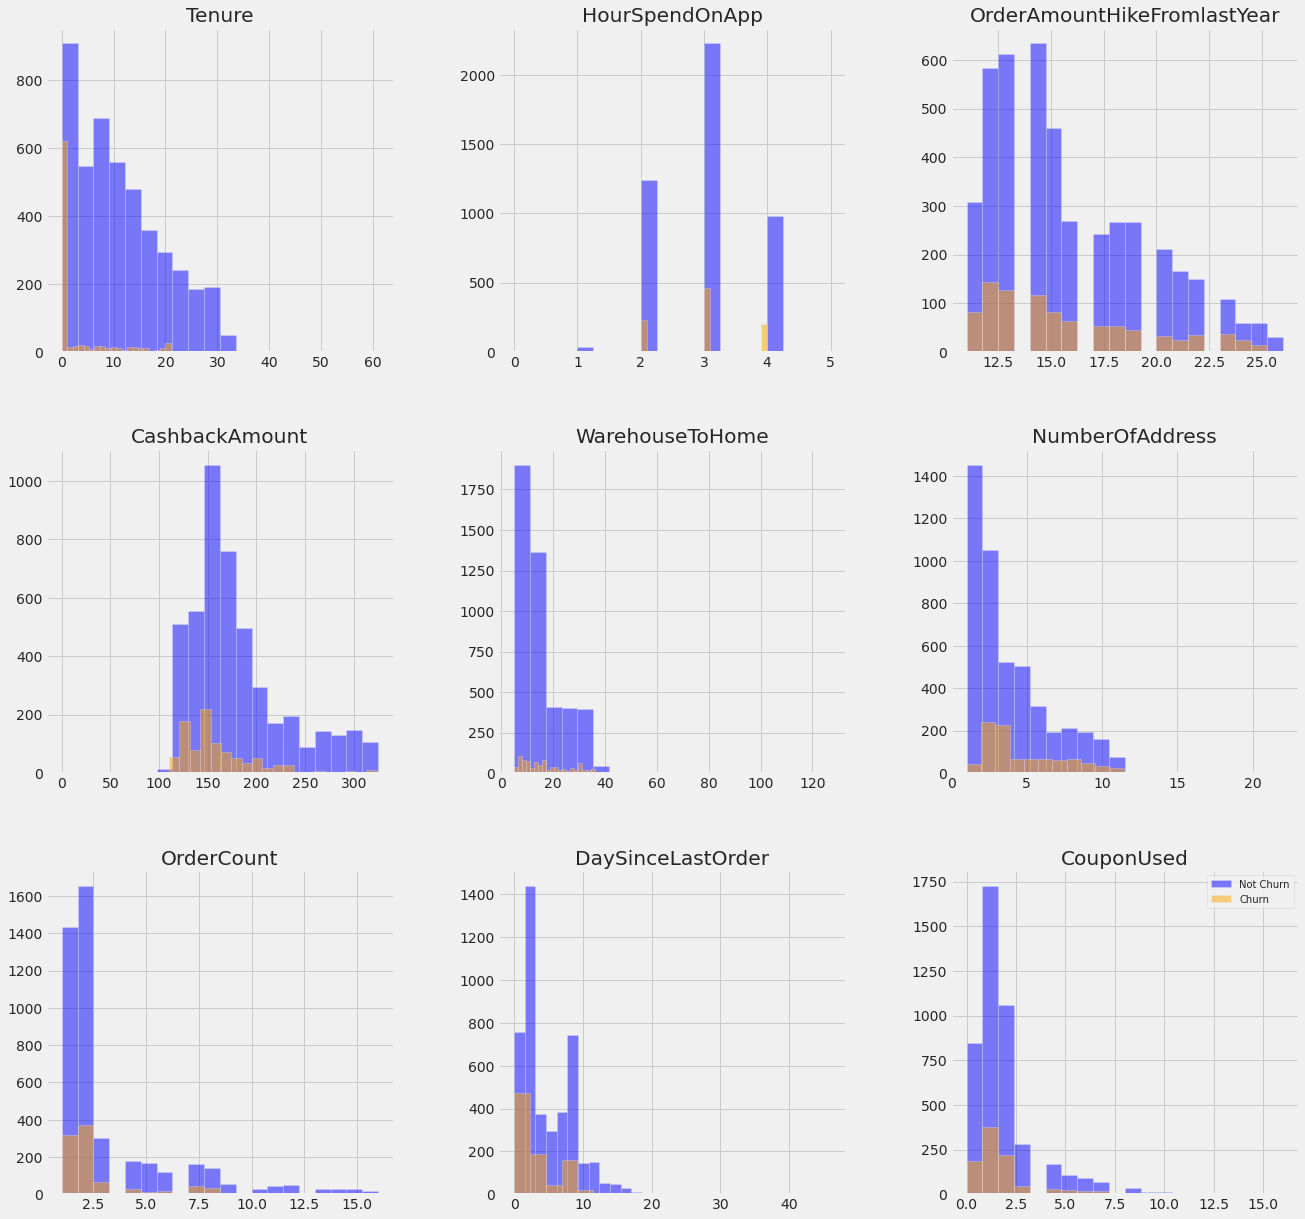

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(20, 20))

df_churn[df_churn.Churn == 0][num_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_churn[df_churn.Churn == 1][num_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.legend(['Not Churn', 'Churn'], loc='upper right', prop={'size':10})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

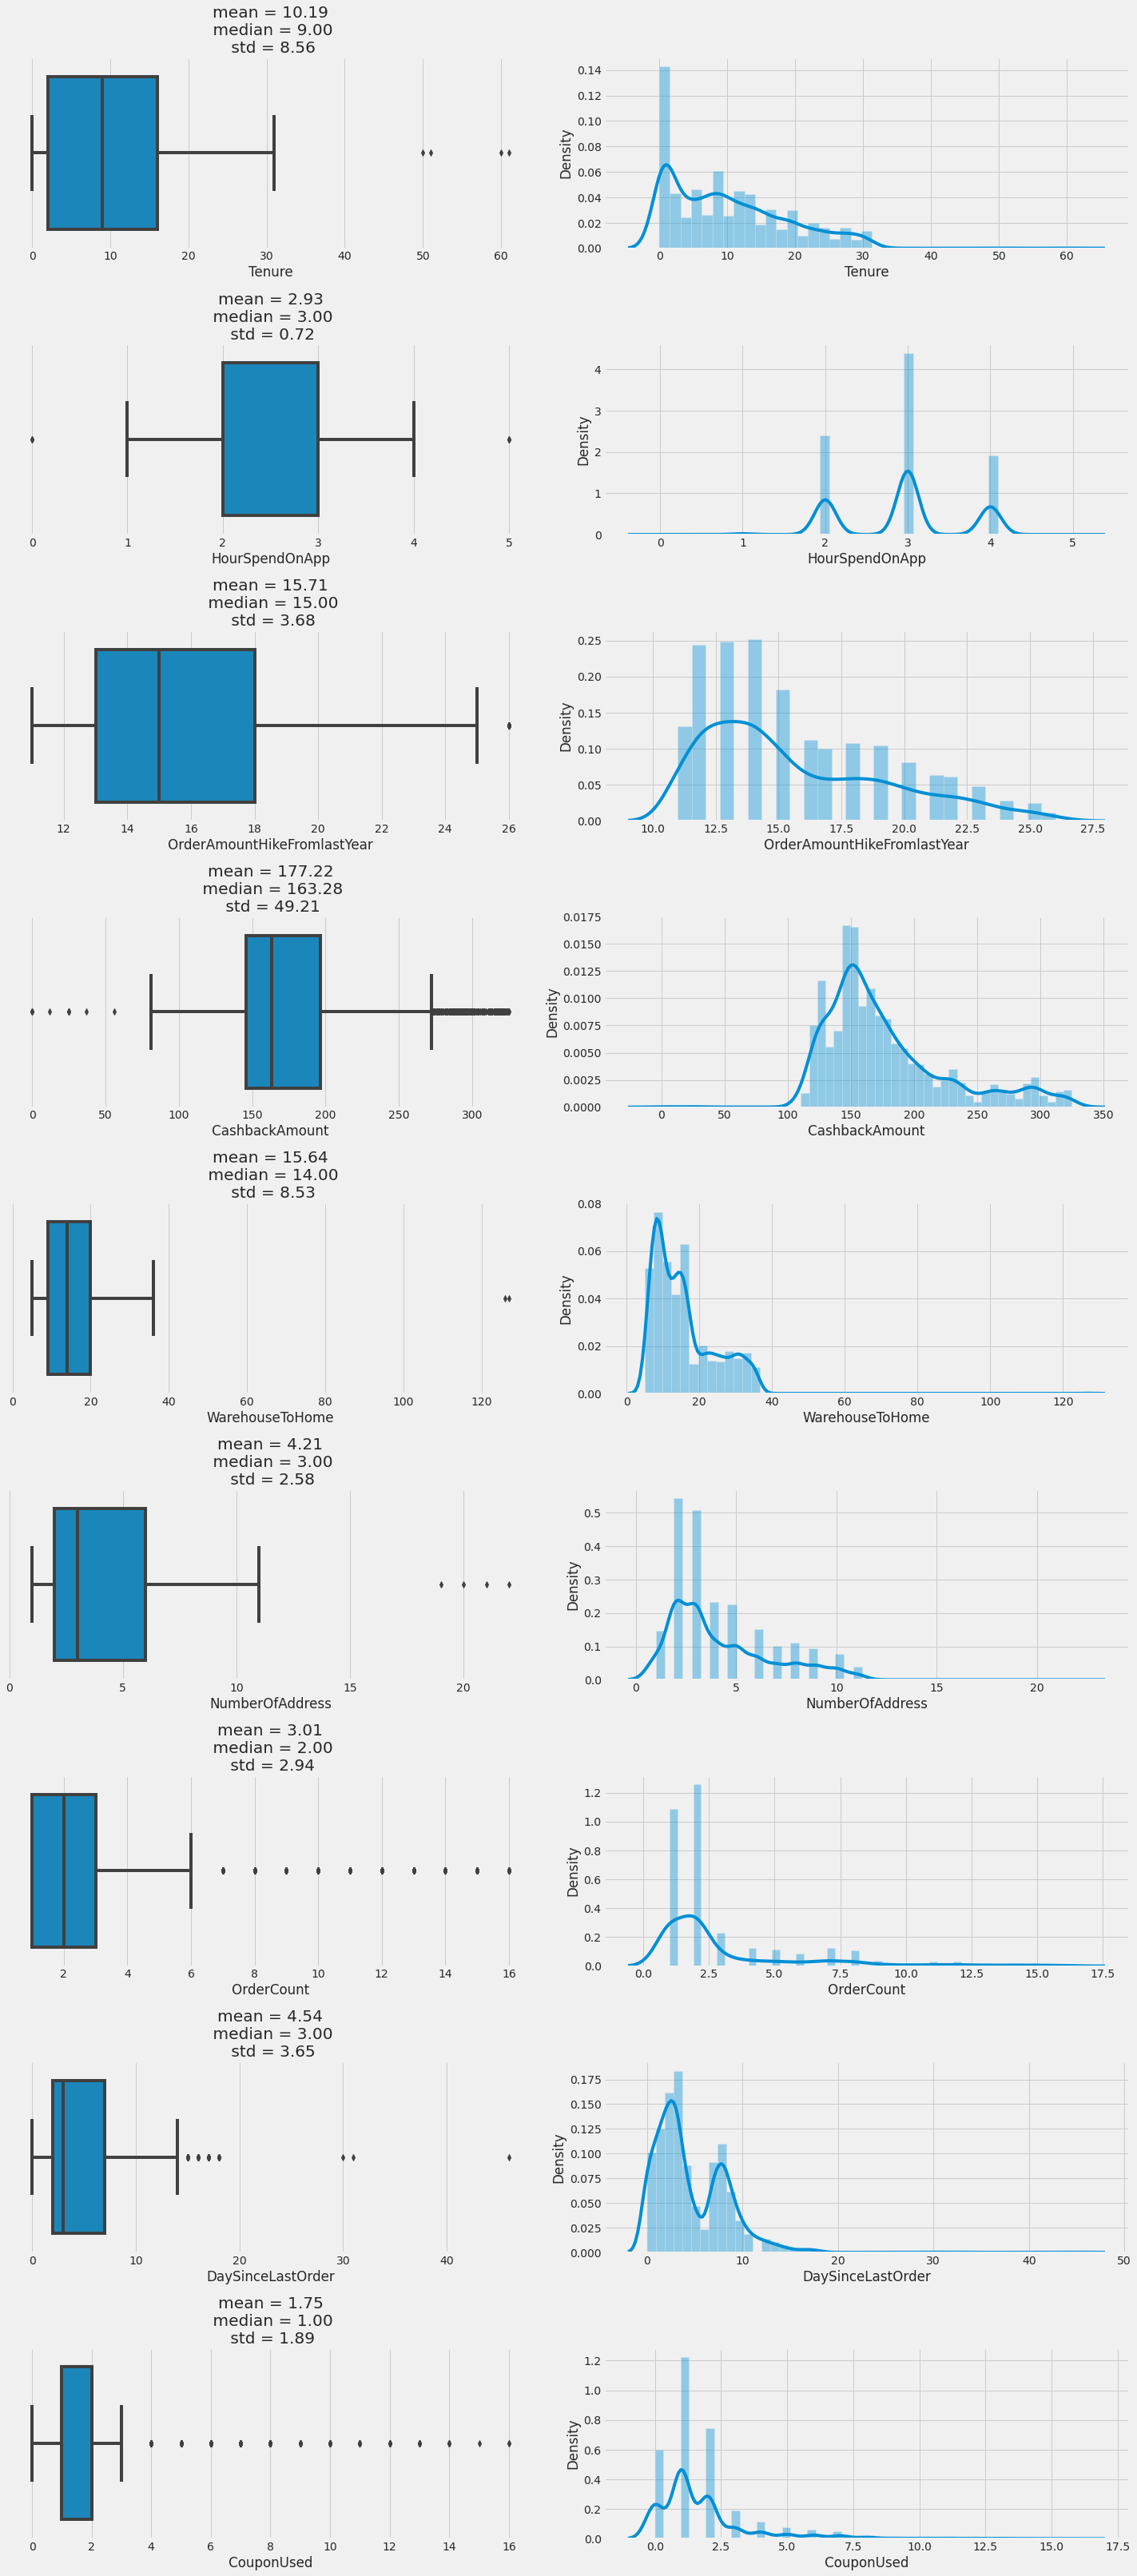

In [ ]:
plt.clf()
  
def observasi_num(features):  
    fig, axs = plt.subplots(9, 2, figsize=(20, 45))
    for i, kol in enumerate(features):
	    sns.boxplot(df_churn[kol], ax = axs[i][0])
	    sns.distplot(df_churn[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df_churn[kol].mean(), df_churn[kol].median(), df_churn[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()   
observasi_num(num_features) 

In [ ]:
df_churn[num_features].describe()

,Tenure,HourSpendOnApp,OrderAmountHikeFromlastYear,CashbackAmount,WarehouseToHome,NumberOfAddress,OrderCount,DaySinceLastOrder,CouponUsed
count,5366.000000,5375.000000,5365.000000,5630.000000,5379.000000,5630.000000,5372.000000,5323.000000,5374.000000
mean,10.189899,2.931535,15.707922,177.223030,15.639896,4.214032,3.008004,4.543491,1.751023
std,8.557241,0.721926,3.675485,49.207036,8.531475,2.583586,2.939680,3.654433,1.894621
min,0.000000,0.000000,11.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,2.000000,13.000000,145.770000,9.000000,2.000000,1.000000,2.000000,1.000000
50%,9.000000,3.000000,15.000000,163.280000,14.000000,3.000000,2.000000,3.000000,1.000000
75%,16.000000,3.000000,18.000000,196.392500,20.000000,6.000000,3.000000,7.000000,2.000000
max,61.000000,5.000000,26.000000,324.990000,127.000000,22.000000,16.000000,46.000000,16.000000


# **Data preparation**

In [ ]:
print('Total missing values data dari kolom Churn', df_churn['Churn'].isnull().sum())

Total missing values data dari kolom Churn 0


In [ ]:
df_churn['CustomerID'].duplicated().any()

False

In [ ]:
df_churn.duplicated().sum()

0

In [ ]:
df_churn = df_churn.drop_duplicates()
df_churn.duplicated().sum()

0

###**drop columns yang tidak diperlukan**

In [ ]:
df_load = df_churn.drop(['CustomerID'], axis=1)
print(df_load.head())

   Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0      1     4.0         Mobile Phone         3              6.0   
1      1     NaN                Phone         1              8.0   
2      1     NaN                Phone         1             30.0   
3      1     0.0                Phone         3             15.0   
4      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4          Credit Card    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single     

###**check missing value**

In [ ]:
print('Total missing values data dari kolom Churn', df_load['Churn'].isnull().sum())

Total missing values data dari kolom Churn 0


In [ ]:
print('Status Missing Values :',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

Jumlah Missing Values masing-masing kolom, adalah:
DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
Churn                            0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64


In [ ]:
dataset_clean = df_load.dropna()

In [ ]:
d={}

# running loop for storing the calculating and storing the values in the relevant dataframes  
for i in df_load.columns:
    d[i] = pd.concat([df_load.groupby(i).Churn.sum(),df_load[i].value_counts(),round(df_load.groupby(i).Churn.sum()*100/df_load[i].value_counts(),2)], axis=1)
    d[i].reset_index(level=0,inplace=True)
    d[i] = d[i].rename(columns = {'index':i, 'Churn':'Customers_churned', i:'Total_Customers', 0:'perc_of_total_cust'},)

In [ ]:
def analysis_chart(variable):
  # definig the plot for matplotlib
  plt.figure(figsize=(30,20))
  fig, ax = plt.subplots()
  # defining the title
  title1 = 'Customers Churn analysed by ' + variable
  plt.title(title1, fontsize=15)
  # defining the lines for the y -axis
  line1 = ax.plot(d[variable][variable],d[variable]['Customers_churned'], color='lightskyblue', label = 'Customers churned')
  line2 = ax.plot(d[variable][variable],d[variable]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
  # labelling the x -axis and y-axis
  plt.xlabel (variable, fontsize=10)
  plt.ylabel ('No. of customers', fontsize=10)
  
  # rotating the labels on the x-axis for better visualisation
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)
  # defining another axis on the right side of the graph
  ax2=ax.twinx()
  # defining the line for the right side y -axis
  line3 = ax2.plot(d[variable][variable],d[variable]['perc_of_total_cust'], color='yellowgreen', label = 'Churn as Percent of total')
  y = 0*d[variable]['perc_of_total_cust']+20.25
  line4 = ax2.plot(d[variable][variable], y, color='orangered', label='Average customer Churn', linestyle='dashed')
  # labelling the right side y-axis
  plt.ylabel ('percentage of customers churned', fontsize=10)
  # adding the three lines to show the legend on the right corner in a coherent place, not doing this will lead to overlapping of legends of lines belonging to left and right y axis
  lines = line1+line2+line3+line4
  labs = [l.get_label() for l in lines]
  ax.legend(lines, labs, bbox_to_anchor=(1.7, 1), fontsize=10)
  # adding sns palette for better visualisation
  sns.despine(ax=ax, right=True, left=True)
  sns.despine(ax=ax2, left=True, right=False)
  plt.grid(None)
  

<Figure size 2160x1440 with 0 Axes>

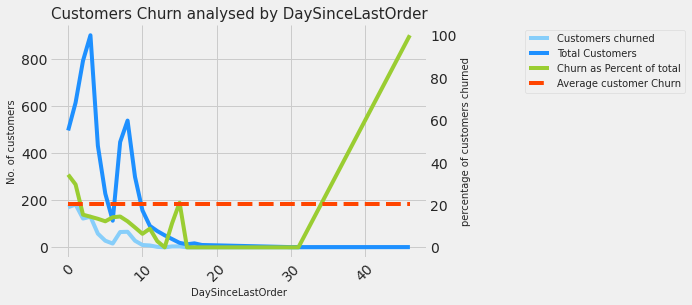

In [ ]:
analysis_chart('DaySinceLastOrder')

<Figure size 2160x1440 with 0 Axes>

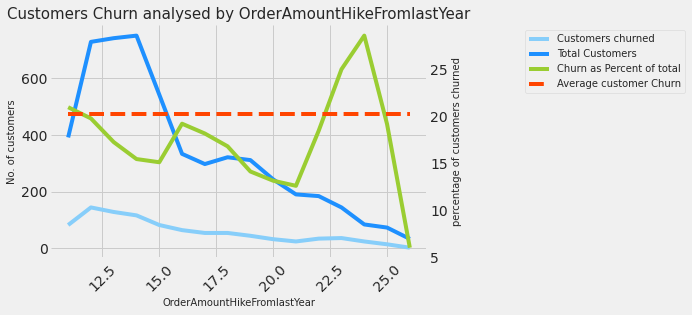

In [ ]:
analysis_chart('OrderAmountHikeFromlastYear')

In [ ]:
for col_name in list(['DaySinceLastOrder','OrderAmountHikeFromlastYear','OrderCount','CouponUsed','HourSpendOnApp','WarehouseToHome','Tenure']):
  median = df_load[col_name].median()
  df_load[col_name].fillna(median, inplace=True)
for col_name in list(['HourSpendOnApp']):
  mode = df_load[col_name].mode()
  df_load[col_name].fillna(mode, inplace=True)

print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))


Jumlah Missing Values setelah di imputer datanya, adalah:
Churn                          0
SatisfactionScore              0
DaySinceLastOrder              0
OrderCount                     0
CouponUsed                     0
OrderAmountHikeFromlastYear    0
Complain                       0
NumberOfAddress                0
MaritalStatus                  0
PreferedOrderCat               0
Tenure                         0
NumberOfDeviceRegistered       0
HourSpendOnApp                 0
Gender                         0
PreferredPaymentMode           0
WarehouseToHome                0
CityTier                       0
PreferredLoginDevice           0
CashbackAmount                 0
dtype: int64


###**mengatasi outlier**

In [ ]:
Q1 = (df_load[['Tenure','HourSpendOnApp','OrderAmountHikeFromlastYear','CashbackAmount','WarehouseToHome','NumberOfAddress','OrderCount','DaySinceLastOrder','CouponUsed']]).quantile(0.25)
Q3 = (df_load[['Tenure','HourSpendOnApp','OrderAmountHikeFromlastYear','CashbackAmount','WarehouseToHome','NumberOfAddress','OrderCount','DaySinceLastOrder','CouponUsed']]).quantile(0.75)

In [ ]:
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah:')
print(maximum)

Nilai Maximum dari masing-masing Variable adalah:
Tenure                          33.00000
HourSpendOnApp                   4.50000
OrderAmountHikeFromlastYear     25.50000
CashbackAmount                 272.32625
WarehouseToHome                 36.50000
NumberOfAddress                 12.00000
OrderCount                       6.00000
DaySinceLastOrder               14.50000
CouponUsed                       3.50000
dtype: float64


In [ ]:
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah:')
print(minimum)


Nilai Minimum dari masing-masing Variable adalah:
Tenure                        -15.00000
HourSpendOnApp                  0.50000
OrderAmountHikeFromlastYear     5.50000
CashbackAmount                 69.83625
WarehouseToHome                -7.50000
NumberOfAddress                -4.00000
OrderCount                     -2.00000
DaySinceLastOrder              -5.50000
CouponUsed                     -0.50000
dtype: float64


In [ ]:
more_than = (df_load>maximum)
lower_than = (df_load<minimum)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


In [ ]:
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

In [ ]:
print('\nPersebaran data setelah ditangani Outlier:')
print(df_load[['Tenure','HourSpendOnApp','OrderAmountHikeFromlastYear','CashbackAmount','WarehouseToHome','NumberOfAddress','OrderCount','DaySinceLastOrder','CouponUsed']].describe())


Persebaran data setelah ditangani Outlier:
            Tenure  HourSpendOnApp  OrderAmountHikeFromlastYear  \
count  5630.000000     5630.000000                  5630.000000   
mean     10.118117        2.934636                    15.671670   
std       8.291334        0.703826                     3.582823   
min       0.000000        0.500000                    11.000000   
25%       3.000000        2.000000                    13.000000   
50%       9.000000        3.000000                    15.000000   
75%      15.000000        3.000000                    18.000000   
max      33.000000        4.500000                    25.500000   

       CashbackAmount  WarehouseToHome  NumberOfAddress   OrderCount  \
count     5630.000000      5630.000000      5630.000000  5630.000000   
mean       175.324229        15.534813         4.207993     2.520604   
std         44.069817         8.089328         2.555111     1.711109   
min         69.836250         5.000000         1.000000     1.00

In [ ]:
df_load['Churn'].shape

(5630,)

In [ ]:
df_load.dtypes

Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [ ]:
df_load.groupby(['Churn','Tenure','Complain']).agg(['mean','count'])[['SatisfactionScore','OrderAmountHikeFromlastYear','OrderCount','DaySinceLastOrder','CashbackAmount']].reset_index()

Churn Tenure Complain SatisfactionScore       OrderAmountHikeFromlastYear  \
                                       mean count                        mean   
0       0    0.0        0          3.005525   181                   15.723757   
1       0    0.0        1          2.781818    55                   14.581818   
2       0    1.0        0          3.098182   275                   16.461818   
3       0    1.0        1          2.833333    66                   15.348485   
4       0    2.0        0          3.000000   129                   15.922481   
..    ...    ...      ...               ...   ...                         ...   
105     1   19.0        1          4.000000     6                   16.666667   
106     1   20.0        0          2.125000     8                   16.250000   
107     1   20.0        1          3.625000     8                   15.500000   
108     1   21.0        0          2.250000     4                   19.000000   
109     1   21.0        1          3.500000     6                   15.000000   

          OrderCount       DaySinceLastOrder       CashbackAmount        
    count       mean count              mean count           mean count  
0     181   1.558011   181          2.900552   181     140.780366   181  
1      55   1.345455    55          2.654545    55     142.222659    55  
2     275   2.269091   275          3.520000   275     158.189645   275  
3      66   2.500000    66          4.015152    66     163.375549    66  
4     129   1.767442   129          4.147287   129     157.558653   129  
..    ...        ...   ...               ...   ...            ...   ...  
105     6   3.333333     6          5.666667     6     227.968750     6  
106     8   3.750000     8          4.000000     8     156.792500     8  
107     8   4.250000     8          5.250000     8     192.709063     8  
108     4   4.000000     4          2.000000     4     188.955000     4  
109     6   4.666667     6          4.333333     6     215.402083     6  

[110 rows x 13 columns]

##**feature engineering**

In [ ]:
new_df = pd.read_excel('/content/gdrive/MyDrive/data bangalore/final project/E Commerce Dataset.xlsx',sheet_name='E Comm',usecols=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']) 
new_df.head()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single


In [ ]:
pd.get_dummies(new_df, drop_first=True).shape

(5630, 16)

In [ ]:
for x in new_df.columns:
    print(x ,':', len(new_df[x].unique()))

PreferredLoginDevice : 3
PreferredPaymentMode : 7
Gender : 2
PreferedOrderCat : 6
MaritalStatus : 3


In [ ]:
new_df.PreferredPaymentMode.value_counts().sort_values(ascending=False).head()

Debit Card     2314
Credit Card    1501
E wallet        614
UPI             414
COD             365
Name: PreferredPaymentMode, dtype: int64

In [ ]:
top = [x for x in new_df.PreferredPaymentMode.value_counts().sort_values(ascending=False).head().index]
top

['Debit Card', 'Credit Card', 'E wallet', 'UPI', 'COD']

In [ ]:
for label in top:
  new_df[label] = np.where(new_df['PreferredPaymentMode']==label,1,0)
new_df[['PreferredPaymentMode']+top]

,PreferredPaymentMode,Debit Card,Credit Card,E wallet,UPI,COD
0,Debit Card,1,0,0,0,0
1,UPI,0,0,0,1,0
2,Debit Card,1,0,0,0,0
3,Debit Card,1,0,0,0,0
4,CC,0,0,0,0,0
...,...,...,...,...,...,...
5625,Credit Card,0,1,0,0,0
5626,Credit Card,0,1,0,0,0
5627,Debit Card,1,0,0,0,0
5628,Credit Card,0,1,0,0,0


In [ ]:
def top_x(df2,variable,top_x_labels):
  
  for label in top_x_labels:
    df2[variable+'_'+label] = np.where(new_df[variable]==label,1,0)

new_df = pd.read_excel('/content/gdrive/MyDrive/data bangalore/final project/E Commerce Dataset.xlsx',sheet_name='E Comm',usecols=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus'])

top_x(new_df,'PreferredPaymentMode',top)
new_df.head()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,PreferredPaymentMode_Debit Card,PreferredPaymentMode_Credit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferredPaymentMode_COD
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single,1,0,0,0,0
1,Phone,UPI,Male,Mobile,Single,0,0,0,1,0
2,Phone,Debit Card,Male,Mobile,Single,1,0,0,0,0
3,Phone,Debit Card,Male,Laptop & Accessory,Single,1,0,0,0,0
4,Phone,CC,Male,Mobile,Single,0,0,0,0,0


In [ ]:
top = [x for x in new_df.PreferredPaymentMode.value_counts().sort_values(ascending=False).head().index]
top_x(new_df,'PreferredLoginDevice',top)

In [ ]:
top = [x for x in new_df.PreferredPaymentMode.value_counts().sort_values(ascending=False).head().index]
top_x(new_df,'Gender',top)

In [ ]:
top = [x for x in new_df.PreferredPaymentMode.value_counts().sort_values(ascending=False).head().index]
top_x(new_df,'PreferedOrderCat',top)

In [ ]:
top = [x for x in new_df.PreferredPaymentMode.value_counts().sort_values(ascending=False).head().index]
top_x(new_df,'MaritalStatus',top)

In [ ]:
dataset = pd.concat([df_load, new_df], axis=1)
dataset.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,PreferredPaymentMode_Debit Card,PreferredPaymentMode_Credit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferredPaymentMode_COD,PreferredLoginDevice_Debit Card,PreferredLoginDevice_Credit Card,PreferredLoginDevice_E wallet,PreferredLoginDevice_UPI,PreferredLoginDevice_COD,Gender_Debit Card,Gender_Credit Card,Gender_E wallet,Gender_UPI,Gender_COD,PreferedOrderCat_Debit Card,PreferedOrderCat_Credit Card,PreferedOrderCat_E wallet,PreferedOrderCat_UPI,PreferedOrderCat_COD,MaritalStatus_Debit Card,MaritalStatus_Credit Card,MaritalStatus_E wallet,MaritalStatus_UPI,MaritalStatus_COD
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90,Phone,UPI,Male,Mobile,Single,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28,Phone,Debit Card,Male,Mobile,Single,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07,Phone,Debit Card,Male,Laptop & Accessory,Single,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0.0,Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60,Phone,CC,Male,Mobile,Single,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = dataset.drop(['Churn','PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','NumberOfAddress'], axis=1)
y = dataset['Churn']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,',sedangkan jumlah baris dan kolom dari y_train adalah:',y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('\nJumlah baris dan kolom dari x_test adalah:',x_test.shape,',sedangkan Jumlah baris dan kolom dari y_test adalah:',y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (3941, 37) ,sedangkan jumlah baris dan kolom dari y_train adalah: (3941,)
Prosentase Churn di data Training adalah:
0    0.830246
1    0.169754
Name: Churn, dtype: float64

Jumlah baris dan kolom dari x_test adalah: (1689, 37) ,sedangkan Jumlah baris dan kolom dari y_test adalah: (1689,)
Prosentase Churn di data Testing adalah:
0    0.834813
1    0.165187
Name: Churn, dtype: float64


In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
pd.Series(y_train).value_counts()

0    3272
1     669
Name: Churn, dtype: int64

In [ ]:
null_accurasy = (3284/(3284+657))
print('null accurasy score: {0:0.4f}'.format(null_accurasy))

null accurasy score: 0.8333


In [ ]:
oversample = SMOTE()
x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)
x_test_over, y_test_over = oversample.fit_resample(x_test, y_test)

In [ ]:
pd.Series(y_train_over).value_counts()

0    3272
1    3272
Name: Churn, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')
x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)
x_test_under, y_test_under = undersample.fit_resample(x_test, y_test)

In [ ]:
pd.Series(y_train_under).value_counts()

0    669
1    669
Name: Churn, dtype: int64

#**training, testing model**

##**logistic reggression**

###**randomundersampler**

####**training model**

In [ ]:
log_model_under= LogisticRegression(C=1, solver='liblinear',random_state=None).fit(x_train_under,y_train_under)
print(log_model_under)

LogisticRegression(C=1, solver='liblinear')


In [ ]:
y_train_pred = log_model_under.predict(x_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84      3272
           1       0.40      0.80      0.53       669

    accuracy                           0.76      3941
   macro avg       0.67      0.78      0.69      3941
weighted avg       0.86      0.76      0.79      3941



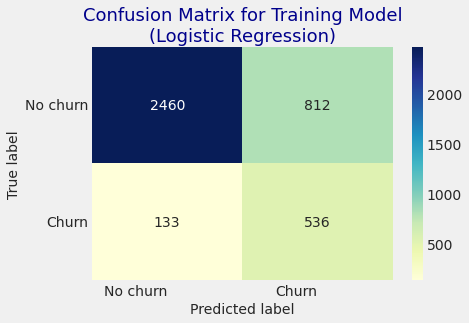

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))


plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

####**testing model**

In [ ]:
log_model_under= LogisticRegression(C=1, solver='liblinear',random_state=None).fit(x_test_under,y_test_under)
print(log_model_under)

LogisticRegression(C=1, solver='liblinear')


In [ ]:
y_test_pred_under = log_model_under.predict(x_test)
print(classification_report(y_test, y_test_pred_under))

              precision    recall  f1-score   support

           0       0.96      0.75      0.84      1410
           1       0.39      0.83      0.53       279

    accuracy                           0.76      1689
   macro avg       0.67      0.79      0.69      1689
weighted avg       0.86      0.76      0.79      1689



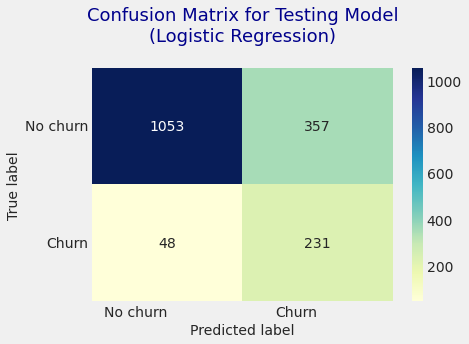

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred_under)), ('No churn', 'Churn'), ('No churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

###**menggunakan SMOTE**

####**training**

In [ ]:
log_model_over = LogisticRegression(random_state=None).fit(x_train_over,y_train_over)
y_train_pred = log_model_over.predict(x_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.85      3272
           1       0.41      0.79      0.54       669

    accuracy                           0.77      3941
   macro avg       0.68      0.78      0.69      3941
weighted avg       0.86      0.77      0.79      3941



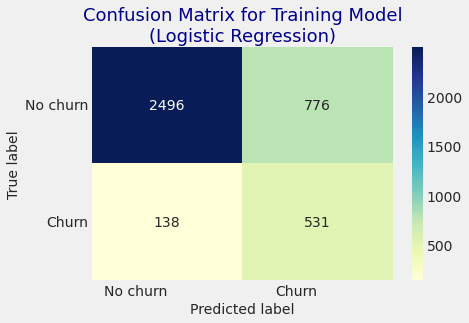

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

####**testing**

In [ ]:
log_model_over = LogisticRegression(random_state=None).fit(x_test_over,y_test_over)
y_test_pred_over = log_model_over.predict(x_test)
print(classification_report(y_test, y_test_pred_over))

              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1410
           1       0.42      0.80      0.55       279

    accuracy                           0.79      1689
   macro avg       0.69      0.79      0.71      1689
weighted avg       0.86      0.79      0.81      1689



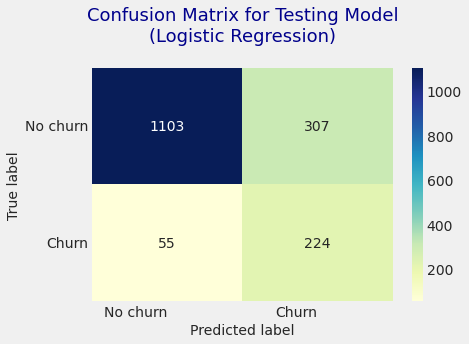

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred_over)), ('No churn', 'Churn'), ('No churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

##**random forest classifier**

###**randomundersampler**

####**training**

In [ ]:
log_model_under= RandomForestClassifier(random_state=None).fit(x_train_under,y_train_under)
y_train_pred = log_model_under.predict(x_train)
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      3272
           1       0.64      1.00      0.78       669

    accuracy                           0.91      3941
   macro avg       0.82      0.94      0.86      3941
weighted avg       0.94      0.91      0.91      3941



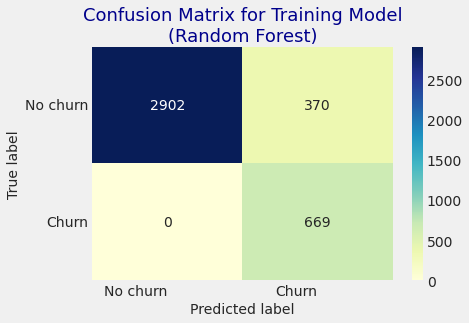

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

####**testing**

In [ ]:
log_model_under= RandomForestClassifier(random_state=None).fit(x_test_under,y_test_under)
y_test_pred = log_model_under.predict(x_test)
print('Classification Report Testing Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression) :
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      1410
           1       0.58      1.00      0.74       279

    accuracy                           0.88      1689
   macro avg       0.79      0.93      0.83      1689
weighted avg       0.93      0.88      0.89      1689



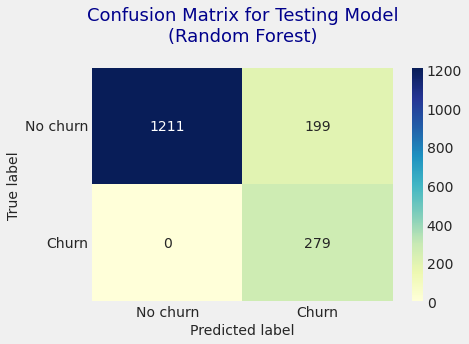

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No churn','Churn'), ('No churn','Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

###**smote**

####**training**

In [ ]:
log_model_over = RandomForestClassifier(random_state=None).fit(x_train_over,y_train_over)
y_train_pred = log_model_over.predict(x_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3272
           1       1.00      1.00      1.00       669

    accuracy                           1.00      3941
   macro avg       1.00      1.00      1.00      3941
weighted avg       1.00      1.00      1.00      3941



####**testing**

In [ ]:
log_model_over = RandomForestClassifier(random_state=None).fit(x_test_over,y_test_over)
y_test_pred = log_model_over.predict(x_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1410
           1       1.00      1.00      1.00       279

    accuracy                           1.00      1689
   macro avg       1.00      1.00      1.00      1689
weighted avg       1.00      1.00      1.00      1689



##**gradient boosting classifier**

###**smote**

####**training**

In [ ]:
log_model_over = GradientBoostingClassifier(random_state=None).fit(x_train_over,y_train_over)
y_train_pred = log_model_over.predict(x_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3272
           1       0.69      0.75      0.72       669

    accuracy                           0.90      3941
   macro avg       0.82      0.84      0.83      3941
weighted avg       0.90      0.90      0.90      3941



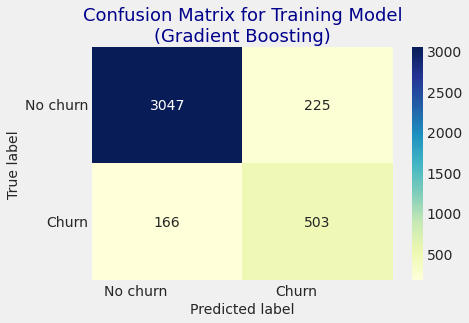

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn','Churn'), ('No churn','Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

####**testing**

In [ ]:
log_model_over = GradientBoostingClassifier(random_state=None).fit(x_test_over,y_test_over)
y_test_pred_over = log_model_over.predict(x_test)
print(classification_report(y_test, y_test_pred_over))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1410
           1       0.78      0.78      0.78       279

    accuracy                           0.93      1689
   macro avg       0.87      0.87      0.87      1689
weighted avg       0.93      0.93      0.93      1689



In [ ]:
cm = confusion_matrix(y_test, y_test_pred_over)

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

####**accurasy**

In [ ]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0734


####**precission**

In [ ]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9560


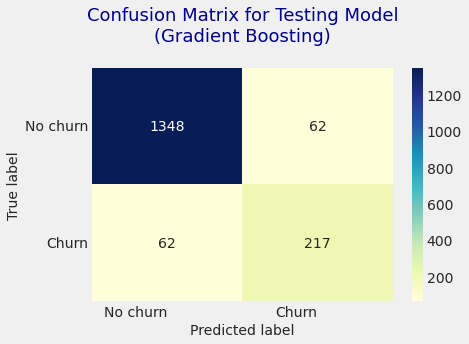

In [ ]:
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred_over)), ('No churn','Churn'), ('No churn','Churn'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

###**randomundersampler**

####**training**

In [ ]:
log_model_under= GradientBoostingClassifier(random_state=None).fit(x_train_under,y_train_under)
y_train_pred = log_model_under.predict(x_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      3272
           1       0.56      0.89      0.69       669

    accuracy                           0.86      3941
   macro avg       0.77      0.88      0.80      3941
weighted avg       0.90      0.86      0.87      3941



####**testing**

In [ ]:
log_model_under= GradientBoostingClassifier(random_state=None).fit(x_test_under,y_test_under)
y_test_pred_under = log_model_under.predict(x_test)
print(classification_report(y_test, y_test_pred_under))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      1410
           1       0.54      0.94      0.69       279

    accuracy                           0.86      1689
   macro avg       0.76      0.89      0.80      1689
weighted avg       0.91      0.86      0.87      1689



In [ ]:
print('Model accuracy using oversampling score: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred_over)))
print('Model accuracy using undersampling score: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred_under)))

Model accuracy using oversampling score: 0.9266
Model accuracy using undersampling score: 0.8585


##**AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

###**randomundersampler**

In [ ]:
log_model_under= AdaBoostClassifier(random_state=None).fit(x_train_under,y_train_under)
y_train_pred = log_model_under.predict(x_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.87      3272
           1       0.46      0.83      0.59       669

    accuracy                           0.81      3941
   macro avg       0.71      0.82      0.73      3941
weighted avg       0.87      0.81      0.83      3941



In [ ]:
log_model_under= AdaBoostClassifier(random_state=None).fit(x_test_under,y_test_under)
y_test_pred_under = log_model_under.predict(x_test)
print(classification_report(y_test, y_test_pred_under))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      1410
           1       0.47      0.89      0.61       279

    accuracy                           0.81      1689
   macro avg       0.72      0.84      0.75      1689
weighted avg       0.89      0.81      0.83      1689



###**smote**

In [ ]:
log_model_over = AdaBoostClassifier(random_state=None).fit(x_train_over,y_train_over)
y_train_pred = log_model_over.predict(x_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      3272
           1       0.55      0.72      0.63       669

    accuracy                           0.85      3941
   macro avg       0.75      0.80      0.77      3941
weighted avg       0.87      0.85      0.86      3941



In [ ]:
log_model_over = AdaBoostClassifier(random_state=None).fit(x_test_over,y_test_over)
y_test_pred_over = log_model_over.predict(x_test)
print(classification_report(y_test, y_test_pred_over))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1410
           1       0.60      0.68      0.63       279

    accuracy                           0.87      1689
   macro avg       0.77      0.79      0.78      1689
weighted avg       0.88      0.87      0.87      1689



In [ ]:
cm = confusion_matrix(y_test, y_test_pred_over)

In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9092


In [ ]:
print('Model accuracy using oversampling score: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred_over)))
print('Model accuracy using undersampling score: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred_under)))

Model accuracy using oversampling score: 0.8709
Model accuracy using undersampling score: 0.8147


#**load dataset copy**

In [ ]:
dataset = df_load.copy()

In [ ]:
dataset.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,Credit Card,Male,3.0,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
